Playground to test out different models for validation.

In [4]:
# Imports
from multi_modal_edge_ai.models.adl_inference.validating.validate import split_and_validate
from multi_modal_edge_ai.models.adl_inference.data_access.parser import parse_file
from multi_modal_edge_ai.models.adl_inference.ml_models.svm_model import SVMModel
import pandas as pd

# Model parameters
window_length_seconds = 300
window_slide_seconds = 150

# File paths
data_A, ground_truth_A = parse_file("../../public_datasets/OrdonezA_Sensors.csv",
                                    "../../public_datasets/OrdonezA_ADLs.csv")
data_B, ground_truth_B = parse_file("../../public_datasets/OrdonezB_Sensors.csv",
                                    "../../public_datasets/OrdonezB_ADLs.csv")

In [0]:
from multi_modal_edge_ai.commons.string_label_encoder import StringLabelEncoder

adls = ['Sleeping', 'Meal_Preparation', 'Kitchen_Usage', 'Bathroom_Usage', 'Idle', 'Relax', 'Outside']
sensors = ['motion_bedroom', 'contact_bathroom', 'motion_kitchen', 'motion_living', 'contact_entrance', 'contact_fridge', 'power_microwave']

adl_encoder = StringLabelEncoder(adls)
ground_truth_A['Activity'] = ground_truth_A['Activity'].apply(adl_encoder.encode_label)
ground_truth_B['Activity'] = ground_truth_B['Activity'].apply(adl_encoder.encode_label)
default_act = adl_encoder.encode_label('Idle')


model = SVMModel() # create svm model

avg, cm = split_and_validate(data_A,
                             ground_truth_A,
                             adls,
                             adl_encoder,
                             default_act,
                             model,
                             window_length_seconds=window_length_seconds,
                             window_slide_seconds=window_slide_seconds)

cm = pd.DataFrame(cm, columns=adls)
pd.set_option("display.max_columns", 10)
print(cm)
print(avg)

In [0]:
# Save the model
model.save('../../.././client/adl_inference/adl_model')

In [5]:
# Save the encoder
adl_encoder.save('../../.././client/adl_inference/adl_encoder')

C:\Users\razva\TUD\Y2\Quarter 4- SP\Multi-Modal Edge-AI\venv\lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


   Sleeping  Meal_Preparation  Kitchen_Usage  Bathroom_Usage  Idle  Relax   
0      1279                 0              0               0     0      0  \
1         0                47              0               1     5      0   
2         0                 0              0               0     0      0   
3         0                 1              0               8    27      0   
4         3                 6              0               4    39     38   
5         0                 1              0               1     4   1312   
6         0                 0              0               0     0      0   

   Outside  
0        0  
1       28  
2        0  
3       16  
4       74  
5        8  
6      278  
0.9317610062893081


In [0]:
from multi_modal_edge_ai.models.adl_inference.validating.validate import validate
from multi_modal_edge_ai.models.adl_inference.preprocessing.window_splitter import split_into_windows

# Model parameters
window_length_seconds = 300
window_slide_seconds = 150

windows = split_into_windows(data_A, ground_truth_A, default_act, window_length_seconds, window_slide_seconds)
split_index = int(len(windows) * 0.6)
train = windows[:split_index]
test = windows[split_index:]

# Define the hyperparameter grid
param_grid = {
    'n_components': [4, 6, 8],
    'max_iter': [1000, 2000, -1],
    'kernel': ['linear', 'rbf'],
}

best_score = 0
best_params = None

# Iterate over each combination of hyperparameters
for n_components in param_grid['n_components']:
    for max_iter in param_grid['max_iter']:
        for kernel in param_grid['kernel']:
            # Create an instance of the SVMModel with current hyperparameters
            model = SVMModel(n_components=n_components, max_iter=max_iter, kernel=kernel)
            score = validate(train, test, model, adls, adl_encoder)
            print(n_components, max_iter, kernel, score[0])
            # Check if the current score is better than the previous best score
            if score[0] > best_score:
                best_score = score[0]
                best_params = {
                    'n_components': n_components,
                    'max_iter': max_iter,
                    'kernel': kernel,
                }

# Print the best hyperparameters found
print("Best hyperparameters:", best_params)

# Print the best score achieved
print("Best score:", best_score)

# Extra ADLs

In [24]:
# Imports
from multi_modal_edge_ai.models.adl_inference.validating.validate import split_and_validate
from multi_modal_edge_ai.models.adl_inference.data_access.parser import parse_file
from multi_modal_edge_ai.models.adl_inference.ml_models.svm_model import SVMModel
import pandas as pd

# Model parameters
window_length_seconds = 300
window_slide_seconds = 150

# File paths
data, ground_truth = parse_file("../../public_datasets/Ordonez_Sensors.csv",
                                    "../../public_datasets/OrdonezExtraA_ADLs.csv")


In [25]:
from multi_modal_edge_ai.commons.string_label_encoder import StringLabelEncoder

adls = ['Sleeping', 'Meal_Preparation', 'Kitchen_Usage', 'Grooming', 'Showering', 'Toileting', 'Idle', 'Relax', 'Outside']
sensors = ['motion_bedroom', 'contact_bathroom', 'motion_kitchen', 'motion_living', 'contact_entrance', 'contact_fridge', 'power_microwave']

adl_encoder = StringLabelEncoder(adls)
ground_truth['Activity'] = ground_truth['Activity'].apply(adl_encoder.encode_label)
default_act = adl_encoder.encode_label('Idle')


model = SVMModel() # create svm model

avg, cm = split_and_validate(data,
                             ground_truth,
                             adls,
                             adl_encoder,
                             default_act,
                             model,
                             window_length_seconds=window_length_seconds,
                             window_slide_seconds=window_slide_seconds)

# cm = pd.DataFrame(cm, columns=adls)
# pd.set_option("display.max_columns", 10)
# print(cm)
print(avg)

Extracting features and labels from windows...
Training model...


Training complete!


C:\Users\alexp\Desktop\multi-modal-edge-ai\venv\lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8613207547169811


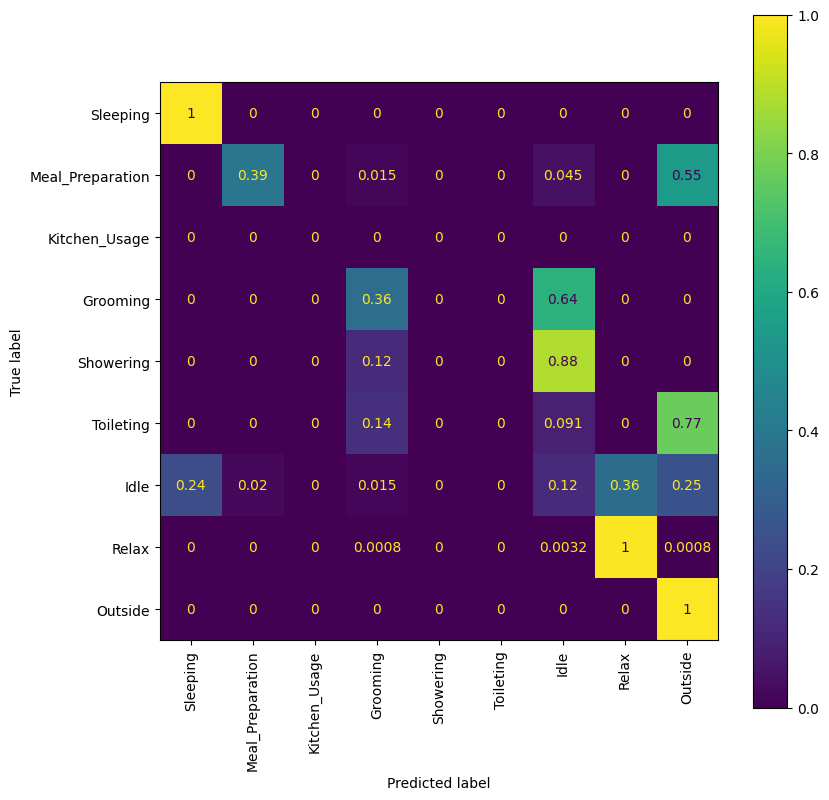

In [32]:
import numpy as np
# Plot confusion matrix
import matplotlib.pyplot as plt
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = adls)
fig, ax = plt.subplots(figsize=(9,9))
cm_display.plot(ax=ax, xticks_rotation='vertical')
plt.show()

In [34]:
model.save('../../.././server/models/adl_model_extra_adls')
adl_encoder.save('../../.././server/models/adl_encoder_extra_adls')